In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import viridis
import os

In [133]:
# select folder
folder_path = '20240418_120658_refP14981_ZnTe200µm_40mW_Bm1'
file_names = [f for f in os.listdir(folder_path) if f.endswith('.dat')]

In [159]:
# Define column names and add angles. This choice is specific to the measurment

column_names = ['ts', 'x_val', 'y_val', 'angle']

for i, file_name in enumerate(file_names):
    file_path = os.path.join(folder_path, file_name)
    
    # Read lines from the file
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    if lines[0].count('\t') >= 3: break
    
    # Add '\tHello' to the end of each line
    modified_lines = [line.rstrip() + f'\t{i * 5}\n' for line in lines]
    modified_lines.insert(0, '\t'.join(column_names) + '\n')

    
    # Write modified lines back to the file
    with open(file_path, 'w') as file:
        file.writelines(modified_lines)

In [160]:
# Make a dataframe combining all the files

dfs = []
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    # Read the first line to get column names
    with open(file_path, 'r') as file:
        columns = file.readline().rstrip().split('\t')
    
    # Read the rest of the file into a DataFrame
    df = pd.read_csv(file_path, delimiter='\t', skiprows=1, names=columns)
    df.dropna(inplace=True)
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into one big DataFrame
df = pd.concat(dfs, ignore_index=True)

In [169]:
def max_abs_with_sign(series):
    """ Maximum detected intensity for each angle """
    max_abs = max(series, key=abs)
    return max_abs

def max_ts_with_max_abs(series_ts, series_x_val):
    """ Time step at which the maximal angle occurs """
    max_abs = max(series_x_val, key=abs)
    max_ts = series_ts[series_x_val.abs() == abs(max_abs)].iloc[0]
    return max_ts

max_valuesx = df.groupby('angle')['x_val'].agg(max_abs_with_sign).reset_index()
max_valuesy = df.groupby('angle')['y_val'].agg(max_abs_with_sign).reset_index()
max_val_position = df.groupby('angle').apply(lambda x: max_ts_with_max_abs(x['ts'], x['x_val'])).reset_index(name='ts')


Text(0, 0.5, 'Peak')

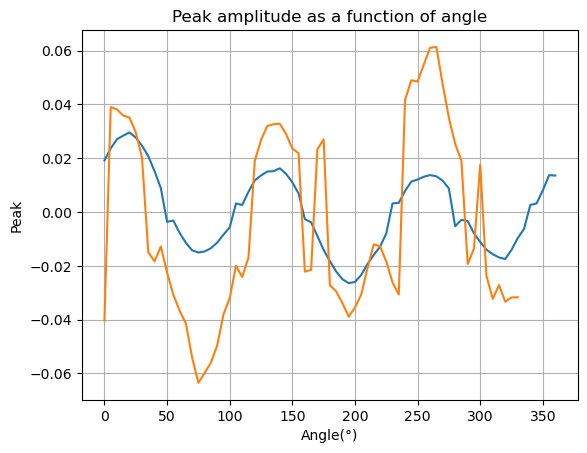

In [184]:
plt.grid('True')
plt.plot(max_valuesx['angle'], max_valuesx['x_val'])
plt.plot(max_valuesy['angle'].shift(6), max_valuesy['y_val']*100)
plt.title('Peak amplitude as a function of angle')
plt.xlabel('Angle(°)')
plt.ylabel('Peak')

Text(0, 0.5, 'max_ts')

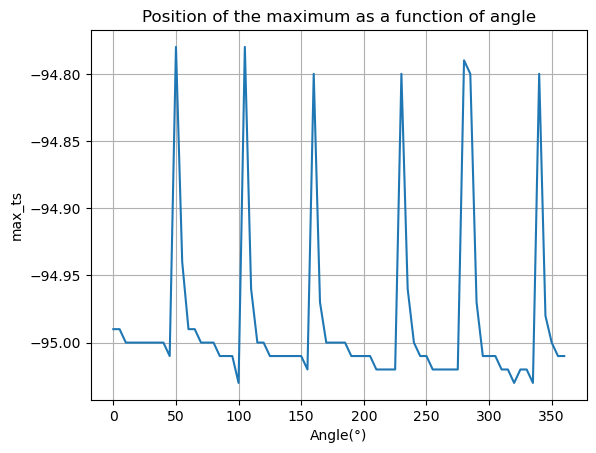

In [163]:
plt.grid('True')
plt.plot(max_val_position['angle'], max_val_position['ts'])
plt.title('Position of the maximum as a function of angle')
plt.xlabel('Angle(°)')
plt.ylabel('max_ts')

In [156]:
def plot_intensity(angles, df):
    """
    Plot x_val against time (ts) for given angle values.
    
    Parameters:
    angles (list or float): List of angle values or a single angle value.
    df (DataFrame): DataFrame containing the data.
    """
    if np.size(angles) == 1:
        angles = [angles]

    # Define the colormap and normalization
    cmap = viridis
    norm = Normalize(vmin=min(angles), vmax=max(angles))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for angle in angles:
        filtered_df = df[df['angle'] == angle]  # Replace 'angle_column_name' with your actual column name
        
        # Plot x_val against time with colormap based on angle
        # ax.scatter(filtered_df['ts'], filtered_df['x_val'], c=[cmap(norm(angle))] * len(filtered_df), marker='o', label=f'{angle} degrees')
        ax.plot(filtered_df['ts'], filtered_df['x_val'], marker='o', linestyle='-', color=cmap(norm(angle)), label=f'{angle} degrees')


    ax.set_title('x_val vs Time')
    ax.set_xlabel('Time ([ps])')
    ax.set_ylabel('x_val')
    ax.grid(True)
    ax.legend()

    # Create a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='Angle (degrees)')

    plt.show()

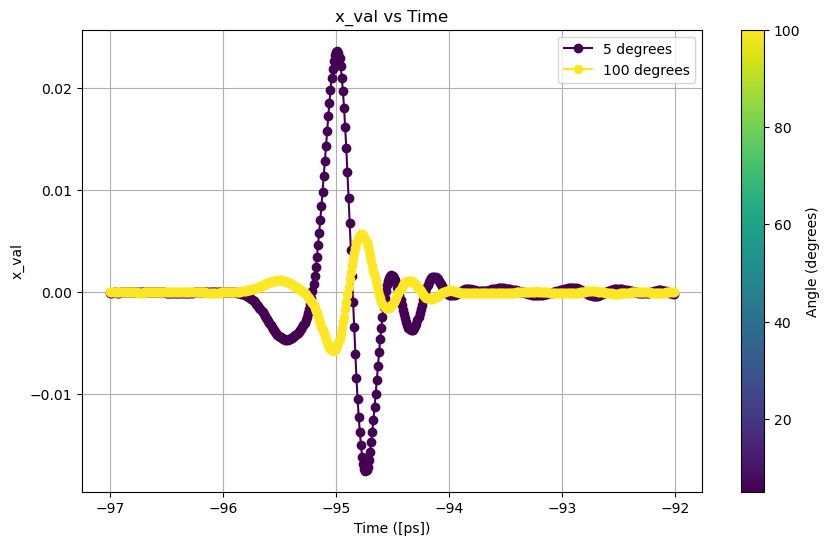

In [157]:
angles = [5,100]
plot_intensity(angles, df)

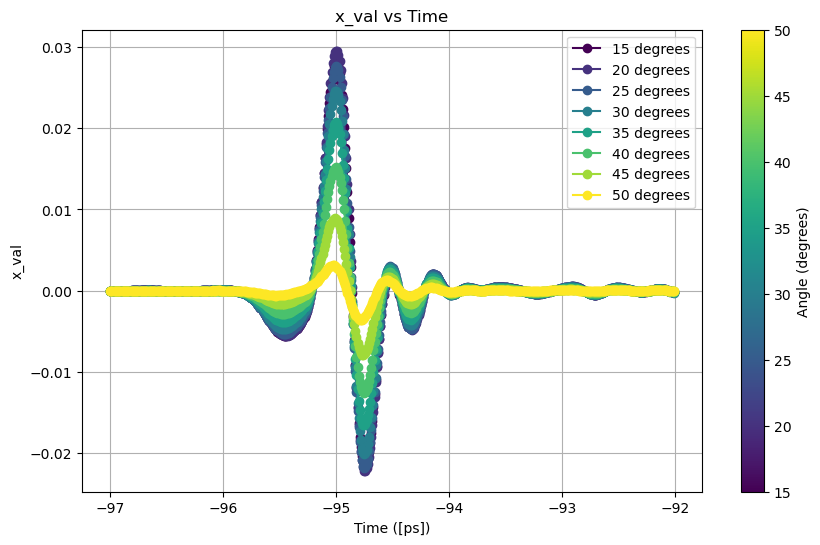

In [158]:
angles = [15,20,25,30,35,40,45,50]
plot_intensity(angles, df)